# Task 1

In [81]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [82]:
music_genre = pd.read_csv("../data/music_genre_preprocessed.csv")
music_genre.pop('Unnamed: 0')
music_genre.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,245503.541466,0.941,0.79200,11,0.115,-5.201,0,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.000000,0.890,0.95000,3,0.124,-7.043,0,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.000000,0.755,0.01180,9,0.534,-4.617,1,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.000000,0.700,0.00253,2,0.157,-4.498,1,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.000000,0.587,0.90900,7,0.157,-6.266,1,0.0413,145.036,0.323,Electronic


In [83]:
music_genre.music_genre.value_counts()

Electronic     5000
Blues          5000
Jazz           5000
Anime          5000
Country        5000
Classical      5000
Rock           5000
Hip-Hop        5000
Rap            5000
Alternative    5000
Name: music_genre, dtype: int64

In [84]:
# Перекодируем целевой признак

music_genre_mapping = {
    "Electronic":1,
    "Rap":2,
    "Classical":3,
    "Rock":4,
    "Hip-Hop":5,
    "Anime":6,
    "Blues":7,
    "Country":8,
    "Jazz":9,
    "Alternative":10
}
music_genre['music_genre'] = music_genre['music_genre'].map(music_genre_mapping)

In [85]:
# Уберем аномалии

outliner_columns = ['duration_ms']

for col in outliner_columns:
    # Первая и третья квантиль
    first_quartile = music_genre[col].describe()['25%']
    third_quartile = music_genre[col].describe()['75%']

    # Интерквантильный размах
    iqr = third_quartile - first_quartile

    # Убираем аномалии
    music_genre = music_genre[(music_genre[col] > (first_quartile - 3 * iqr)) & 
                              (music_genre[col] < (third_quartile + 3 * iqr))]

In [86]:
# Возьмем только 5000 объектов из перемешанной выборки
music_genre = shuffle(music_genre, random_state=0)
music_genre = music_genre.iloc[:5000]
music_genre.reset_index(drop=True, inplace=True)

In [87]:
X = music_genre.drop(['music_genre'], 1)
y = music_genre['music_genre']

In [88]:
# Разбиваем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
pipe = Pipeline([('scale', StandardScaler()),
                 ('clf', SVC(kernel = 'linear', C = 1))])

param_grid = dict(clf__C=np.logspace(-4, 1, 6),
                  clf__kernel=['rbf','linear'])

grid = GridSearchCV(pipe, 
                    param_grid=param_grid, 
                    cv=3, 
                    n_jobs=1, 
                    verbose=2, scoring= 'accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.cv_results_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   3.6s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   3.5s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   3.3s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   1.7s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   1.5s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   1.6s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   2.9s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   2.9s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   2.9s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   1.4s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   1.5s
[CV] END ...................clf__C=0.001, clf__k

In [11]:
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 70   0   1   2   5  12   7  10  17  15]
 [  5  46   0  25  59   0   0   8   2   7]
 [  3   0 110   0   0   4   3   0   6   4]
 [  1   6   1 101   4   0   0  20   7   3]
 [  1  51   0  10  90   0   0   6   5   9]
 [ 10   0  13   1   0  87  19   5   4   2]
 [  4   0   6   3   3   9  72  24  21   5]
 [  4   0   2  30   6   3  12  85  10  14]
 [ 25   2  12   7   6   6  16  15  47   6]
 [ 10   8   0  30  20   1   5  31   7  56]]
              precision    recall  f1-score   support

           1       0.53      0.50      0.51       139
           2       0.41      0.30      0.35       152
           3       0.76      0.85      0.80       130
           4       0.48      0.71      0.57       143
           5       0.47      0.52      0.49       172
           6       0.71      0.62      0.66       141
           7       0.54      0.49      0.51       147
           8       0.42      0.51      0.46       166
           9       0.37      0.33      0.35       142
          10       0.46     

In [10]:
from catboost import CatBoostClassifier

CatBCl = CatBoostClassifier()
CatBCl.fit(X_train, y_train, verbose=False)
y_cat_pred = CatBCl.predict(X_test)

print(confusion_matrix(y_test, y_cat_pred))
print(classification_report(y_test, y_cat_pred))

[[ 85   0   2   4   1   8  10   2  14   9]
 [  1  54   0  12  69   0   0   1   0   7]
 [  2   0  97   0   0  12   6   0  11   1]
 [  1  15   0  96   5   0   1   7   1  15]
 [  2  60   0   9  76   0   0   5   0  14]
 [ 10   1  10   2   0 102   9   6   1   6]
 [  8   0   3   4   0  17  69  21  20   5]
 [  2   4   1  32   3   2  10  94  11  13]
 [ 27   1  12   8   3   4  17   9  72   5]
 [ 14  14   0  29  11   1   3  19   9  61]]
              precision    recall  f1-score   support

           1       0.56      0.63      0.59       135
           2       0.36      0.38      0.37       144
           3       0.78      0.75      0.76       129
           4       0.49      0.68      0.57       141
           5       0.45      0.46      0.46       166
           6       0.70      0.69      0.70       147
           7       0.55      0.47      0.51       147
           8       0.57      0.55      0.56       172
           9       0.52      0.46      0.48       158
          10       0.45     

Такие вот результаты

In [11]:
def pipe_grid_svc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    pipe = Pipeline([('scale', StandardScaler()),
                     ('clf', SVC(kernel = 'linear', C = 1))])

    param_grid = dict(clf__C=np.logspace(-4, 1, 6),
                      clf__kernel=['rbf','linear'])

    grid = GridSearchCV(pipe, 
                        param_grid=param_grid, 
                        cv=3, 
                        n_jobs=1, 
                        verbose=2, scoring= 'accuracy')
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    print(grid.cv_results_)

    y_pred = grid.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [140]:
from catboost import CatBoostClassifier
def cat_boo(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    
    CatBCl = CatBoostClassifier()
    CatBCl.fit(X_train, y_train, verbose=False)
    y_cat_pred = CatBCl.predict(X_test)

    print(confusion_matrix(y_test, y_cat_pred))
    print(classification_report(y_test, y_cat_pred))

### Отбор признаков

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import ExtraTreesClassifier

##### Одномерный отбор признаков (SelectKBest)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_t = scaler.transform(X)

# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X_t, y)

# summarize scores
print(fit.scores_)
features = fit.transform(X_t)

# summarize selected features
print(features[0:5,:])

[ 173.20385714  716.21765529  125.35200286    8.61306356  191.62030162
 1073.47287141    2.13038609   10.44310536   50.65409125   85.74333614
  233.47521877   13.26155625  102.6330807 ]
[[7.91666667e-01 3.78513189e-01 8.89772932e-01 1.90332326e-01
  1.87866928e-01]
 [5.62500000e-01 8.48380802e-02 5.86147464e-01 5.05538771e-03
  1.80528376e-01]
 [3.85416667e-01 7.06814340e-02 9.04803896e-01 0.00000000e+00
  2.97211350e-02]
 [4.27083333e-01 1.00400351e-01 2.75507546e-01 1.80261833e-03
  2.50733855e-02]
 [5.93750000e-01 4.28701502e-02 6.61302283e-01 9.10372608e-06
  3.00391389e-01]]


In [15]:
# индексы наиболее важных признаков
skb = [0, 1, 4, 5, 10]

In [16]:
X_skb = X.iloc[:, [0, 1, 4, 5, 10]]

In [17]:
X_skb.head()

,popularity,acousticness,energy,instrumentalness,speechiness
0,76.0,0.3770,0.889,0.189000,0.1760
1,54.0,0.0845,0.586,0.005020,0.1700
2,37.0,0.0704,0.904,0.000000,0.0467
3,41.0,0.1000,0.276,0.001790,0.0429
4,57.0,0.0427,0.661,0.000009,0.2680


In [18]:
pipe_grid_svc(X_skb, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   3.0s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   2.7s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   3.0s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   2.0s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   2.1s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   2.0s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   2.9s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   2.9s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   2.8s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   1.3s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   1.4s
[CV] END ...................clf__C=0.001, clf__k

In [19]:
cat_boo(X_skb, y)

[[ 63   0   1   6   2  15  30   6  19  14]
 [  1  63   0   8  52   0   0   2   2  10]
 [  2   0 105   1   0   8   7   1  10   2]
 [  1  17   0  78   7   0   0  11   6  10]
 [  3  47   0  14  96   0   1   6   1   4]
 [ 14   1  15   0   0  87  19   6   3   3]
 [  9   1   4   4   4  14  72  19  15   5]
 [  2   7   0  29   3   3  13  83  11  14]
 [ 26   1  11   6   1   2  18  22  56  12]
 [  6  13   3  23   8   1   4  23  10  62]]
              precision    recall  f1-score   support

           1       0.50      0.40      0.45       156
           2       0.42      0.46      0.44       138
           3       0.76      0.77      0.76       136
           4       0.46      0.60      0.52       130
           5       0.55      0.56      0.56       172
           6       0.67      0.59      0.63       148
           7       0.44      0.49      0.46       147
           8       0.46      0.50      0.48       165
           9       0.42      0.36      0.39       155
          10       0.46     

##### Рекурсивное исключение признаков (recursive feature elimination, RFE)

In [20]:
# feature extraction
scaler = StandardScaler()
scaler.fit(X)
X_s = scaler.transform(X)

model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X_s, y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


5
[ True False  True False False  True False False  True False  True False
 False]
[1 3 1 5 4 1 9 8 1 6 1 7 2]


In [21]:
# индексы наиболее важных признаков
rfe = [0, 2, 5, 8, 10]

In [22]:
X_rfe = X.iloc[:, [0, 2, 5, 8, 10]]

In [23]:
X_rfe.head()

,popularity,danceability,instrumentalness,loudness,speechiness
0,76.0,0.527,0.189000,-6.823,0.1760
1,54.0,0.816,0.005020,-9.014,0.1700
2,37.0,0.373,0.000000,-6.348,0.0467
3,41.0,0.370,0.001790,-17.107,0.0429
4,57.0,0.746,0.000009,-7.658,0.2680


In [24]:
pipe_grid_svc(X_rfe, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   6.1s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   6.4s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   8.7s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   4.3s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   4.8s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   4.8s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   7.5s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   5.8s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   6.9s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   2.7s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   4.1s
[CV] END ...................clf__C=0.001, clf__k

In [25]:
cat_boo(X_rfe, y)

[[ 70   0   3   2   0   6  16   8  36   8]
 [  0  52   0  12  64   0   0   4   1   8]
 [  4   0 118   0   0   6   5   1   6   2]
 [  1   4   0  85   7   0   1  18   3  16]
 [  2  56   0   8  81   0   1   5   1   7]
 [ 14   0  12   0   0  93  18   3   2   5]
 [  8   1   4   4   2  16  70  14  20  10]
 [  1   3   0  30   5   5  13  83  21  20]
 [ 26   0  12   5   1   2  21  15  56   8]
 [  4  11   0  30  13   2   4  27  10  48]]
              precision    recall  f1-score   support

           1       0.54      0.47      0.50       149
           2       0.41      0.37      0.39       141
           3       0.79      0.83      0.81       142
           4       0.48      0.63      0.55       135
           5       0.47      0.50      0.49       161
           6       0.72      0.63      0.67       147
           7       0.47      0.47      0.47       149
           8       0.47      0.46      0.46       181
           9       0.36      0.38      0.37       146
          10       0.36     

##### Отбор на основе важности признаков (ExtraTreesClassifier)

In [26]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.15326256 0.08782352 0.09268602 0.06547848 0.08068753 0.09192268
 0.05220557 0.05714365 0.07965995 0.01846845 0.08945481 0.06016855
 0.07103823]


In [27]:
# индексы наиболее важных признаков
etc = [0, 1, 2, 5, 10]

In [28]:
X_etc = X.iloc[:, [0, 1, 2, 5, 10]]

In [29]:
X_etc.head()

,popularity,acousticness,danceability,instrumentalness,speechiness
0,76.0,0.3770,0.527,0.189000,0.1760
1,54.0,0.0845,0.816,0.005020,0.1700
2,37.0,0.0704,0.373,0.000000,0.0467
3,41.0,0.1000,0.370,0.001790,0.0429
4,57.0,0.0427,0.746,0.000009,0.2680


In [30]:
pipe_grid_svc(X_etc, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   4.1s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   3.4s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   3.4s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   2.2s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   4.6s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   3.9s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   4.6s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   9.6s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   5.6s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   2.6s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   2.3s
[CV] END ...................clf__C=0.001, clf__k

In [31]:
cat_boo(X_etc, y)

[[ 76   1   2   2   3   6  14   6  20   8]
 [  4  53   0  17  73   1   0   0   0   4]
 [  1   0 107   0   0   9   7   1   8   3]
 [  0  12   0  86   6   0   1   9   5  13]
 [  1  58   0  15  84   0   0   7   1   5]
 [ 14   0  14   1   0  91  16   8   2   3]
 [ 17   1   5   7   1  14  62  21  14   9]
 [  3   5   1  33   3   1  12  87   8  13]
 [ 24   0   7   9   2   3  32  12  45   9]
 [ 10   6   0  25  17   0   8  23  10  63]]
              precision    recall  f1-score   support

           1       0.51      0.55      0.53       138
           2       0.39      0.35      0.37       152
           3       0.79      0.79      0.79       136
           4       0.44      0.65      0.53       132
           5       0.44      0.49      0.47       171
           6       0.73      0.61      0.66       149
           7       0.41      0.41      0.41       151
           8       0.50      0.52      0.51       166
           9       0.40      0.31      0.35       143
          10       0.48     

### Понижение размерности

##### Метод главных компонент (principal component analysis, PCA)

In [19]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(X)
features = fit.transform(X)

# summarize components
print(f'Explained Variance: {fit.explained_variance_ratio_}')
print(features[0:5,:])

Explained Variance: [9.99999772e-01 1.70492521e-07 4.88052575e-08 6.18726737e-09
 2.52507328e-09]
[[-5.24786827e+04  5.82305051e+01  2.91827810e+01  4.75954839e+00
   9.54959285e-01]
 [-2.39706827e+04 -1.71513533e+01  9.71175968e+00  2.92226459e-01
   5.85943296e+00]
 [-6.87868240e+03  1.52237829e+01 -7.59515925e+00 -2.83565674e+00
  -3.29500485e+00]
 [ 1.14414317e+05 -1.03189734e+00 -3.35144584e+00  7.65008138e+00
   2.01019835e+00]
 [-8.66746827e+04 -5.47324231e-01  1.17081658e+01  7.21789372e-02
   4.87327414e+00]]


In [38]:
pipe_grid_svc(features[:,:], y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   4.3s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   4.2s
[CV] END .....................clf__C=0.0001, clf__kernel=rbf; total time=   4.3s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   2.0s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   2.6s
[CV] END ..................clf__C=0.0001, clf__kernel=linear; total time=   2.2s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   4.1s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   4.3s
[CV] END ......................clf__C=0.001, clf__kernel=rbf; total time=   4.1s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   2.2s
[CV] END ...................clf__C=0.001, clf__kernel=linear; total time=   2.2s
[CV] END ...................clf__C=0.001, clf__k

In [39]:
cat_boo(features[:,:], y)

[[ 38   7   4   4   0  19  29  13  15  19]
 [  3  40   0  28  54   0   0   3   1  13]
 [  4   0 106   2   0   6   9   4  12   1]
 [  4  37   0  51  47   0   0   7   4   9]
 [  2  42   0  32  44   0   2   6   8  15]
 [ 10   0  19   0   1  93  17   3   4   4]
 [ 30   2   5   6   1  25  41  12  13   5]
 [  8   9   1  18  17   2  11  54  12  27]
 [ 17   2   9   5   6   6  15  19  55  11]
 [  7  12   0  28  25   2   2  36  14  35]]
              precision    recall  f1-score   support

           1       0.31      0.26      0.28       148
           2       0.26      0.28      0.27       142
           3       0.74      0.74      0.74       144
           4       0.29      0.32      0.31       159
           5       0.23      0.29      0.25       151
           6       0.61      0.62      0.61       151
           7       0.33      0.29      0.31       140
           8       0.34      0.34      0.34       159
           9       0.40      0.38      0.39       145
          10       0.25     

Отбор признаков до 5 самых важных, не улучшил качество моделей. Это произошло в силу множества причин:
1. Прикладная область — музыка. Даже человек легко путает жанры «Хип-хоп» и «Рэп».
2. Понижение количества признаков в данном случае, скорее уменьшает кол-во «полезных» данных, чем избавляет от шума.
3. Такому кол-ву признаков не хватает данных, чтобы восстановить зависимости классов.

# Task 2

1. Ознакомиться: [Кластеризация](https://www.notion.so/17e92c0840544e5c8f8576c5e87a23e7) 
2. Применить методы кластеризации для датасета классификации 
3. Оценить качество кластеризации (2 внешних и 2 внутренних)

### Метод k-средних

In [147]:
# Импортируем библиотеки
from sklearn.cluster import KMeans

# Описываем модель
model = KMeans(n_clusters=10)

# Проводим моделирование
model.fit(X)

y_pred = model.predict(X)

In [158]:
from sklearn import metrics

In [160]:
metrics.rand_score(y, y_pred)

0.786674374874975

In [161]:
labels = model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5534384743290335

In [151]:
metrics.homogeneity_score(y, y_pred)

0.036121204277429576

In [152]:
metrics.completeness_score(y, y_pred)

0.03988969970702874

In [153]:
metrics.v_measure_score(y, y_pred)

0.037912034093885175

### Иерархическая кластеризация

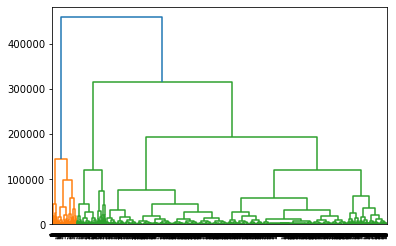

In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

varieties = y.values

samples = X.values

mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

### t-SNE

In [195]:
labels_true = y[:5000]
Xx = StandardScaler().fit_transform(X[:5000])
n_components = 3
pca = PCA(n_components=n_components).fit(Xx)
pca_2d = pca.transform(Xx)
if n_components == 2: plt.scatter(pca_2d[:,0], pca_2d[:,1], c=labels_true)

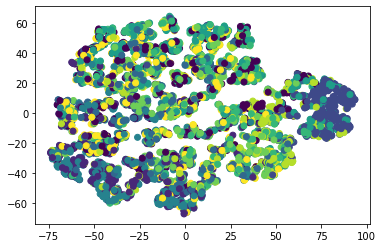

In [196]:
# Импорт библиотек
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Определяем модель и скорость обучения
model = TSNE()

# Обучаем модель
transformed = model.fit_transform(pca_2d)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=y[:5000])
plt.show()

In [197]:
cat_boo(transformed, y[:5000])

[[ 23  11   4  11   6  30  14  19  16  22]
 [  7  25   0   6  77   2   9   9   3   9]
 [  2   0 117   0   0   4   4   1  11   1]
 [ 15  13   1  17  21  18  20  25  11  21]
 [  7  43   0  12  64   2   2  11   4   4]
 [ 12   1  27   4   0  47  20  20  11  13]
 [ 16   2   4   7   4  16  19  21  27  15]
 [ 15   6   1  22   8  11  22  49  21  13]
 [ 18   9  18   5  11  14  14  15  37   3]
 [ 14  14   0  13  15  23  10  26   7  26]]
              precision    recall  f1-score   support

           1       0.18      0.15      0.16       156
           2       0.20      0.17      0.18       147
           3       0.68      0.84      0.75       140
           4       0.18      0.10      0.13       162
           5       0.31      0.43      0.36       149
           6       0.28      0.30      0.29       155
           7       0.14      0.15      0.14       131
           8       0.25      0.29      0.27       168
           9       0.25      0.26      0.25       144
          10       0.20     

### DBSCAN

Estimated number of clusters: 1
Estimated number of noise points: 104
Homogeneity: 0.029
Completeness: 0.331
V-measure: 0.054
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.052


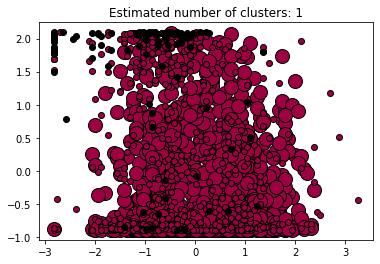

In [181]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

labels_true = y[:2000]

Xx = StandardScaler().fit_transform(X[:2000])
pca = PCA(n_components=2).fit(Xx)
pca_2d = pca.transform(Xx)
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=3.6, min_samples=170).fit(Xx)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = Xx[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = Xx[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()